### Installation




In [1]:
!nvidia-smi --query-gpu=name,utilization.gpu,utilization.memory,memory.total,memory.free --format=csv

name, utilization.gpu [%], utilization.memory [%], memory.total [MiB], memory.free [MiB]
NVIDIA A100-SXM4-40GB, 0 %, 0 %, 40960 MiB, 40506 MiB


In [2]:
import torch
device = torch.device("cuda")

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [4]:
!pip install --upgrade pip setuptools wheel
!apt-get update
!apt-get install -y build-essential libopenblas-dev libomp-dev
!apt-get install -y cuda-libraries-12-2

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 1s (262 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package list

In [5]:
!pip install torch --pre --index-url https://download.pytorch.org/whl/nightly/cu122

Looking in indexes: https://download.pytorch.org/whl/nightly/cu122


In [6]:
!sudo ln -sf /usr/local/cuda-12.2/lib64/libcudart.so.12 /usr/lib/x86_64-linux-gnu/libcudart.so.11
!sudo ln -sf /usr/local/cuda-12.2/lib64/libcudart.so.12 /usr/lib/x86_64-linux-gnu/libcudart.so.11.0

In [7]:
!ls -l /usr/lib/x86_64-linux-gnu/libcudart.so.11*

lrwxrwxrwx 1 root root 42 May  9 21:53 /usr/lib/x86_64-linux-gnu/libcudart.so.11 -> /usr/local/cuda-12.2/lib64/libcudart.so.12
lrwxrwxrwx 1 root root 42 May  9 21:53 /usr/lib/x86_64-linux-gnu/libcudart.so.11.0 -> /usr/local/cuda-12.2/lib64/libcudart.so.12


In [8]:
!export FORCE_CUDA="1"
!export TORCH_CUDA_ARCH_LIST="7.5"
!export PATH="/usr/local/cuda-12.2/bin:$PATH"
!export LD_LIBRARY_PATH="/usr/local/cuda-12.2/lib64:$LD_LIBRARY_PATH"

In [9]:
!pip uninstall -y flash-attn

Found existing installation: flash_attn 2.7.4.post1
Uninstalling flash_attn-2.7.4.post1:
  Successfully uninstalled flash_attn-2.7.4.post1


In [10]:
!git clone https://github.com/HazyResearch/flash-attention.git
%cd flash-attention

fatal: destination path 'flash-attention' already exists and is not an empty directory.
/content/flash-attention


In [11]:
!pip install . --no-build-isolation

Processing /content/flash-attention
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'flash_attn' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'flash_attn'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for flash_attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187831595 sha256=58853b28a5a926cae14402bfd8d4d93a45ebf8f9e79533f37ab09d0d77a99c05
  Stored in directory: /root/.cache/pip/wheels/1d/53/c5/000e1a593bdcce30072c46e5cf710bb5b1e2fa0fded85ca9e4
Successfully built flash_attn


In [12]:
import flash_attn
print("FlashAttention 2.4 installed successfully!")

FlashAttention 2.4 installed successfully!


In [13]:
!pip show flash-attn

Name: flash_attn
Version: 2.7.4.post1
Summary: Flash Attention: Fast and Memory-Efficient Exact Attention
Home-page: https://github.com/Dao-AILab/flash-attention
Author: Tri Dao
Author-email: tri@tridao.me
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: einops, torch
Required-by: 


In [14]:
!nvidia-smi

Fri May  9 21:53:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   32C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [15]:
!pip install transformers rouge rouge-score nltk datasets

In [16]:
import torch
from torch.amp import autocast
import math
import time
from transformers import Trainer, TrainingArguments, GPT2LMHeadModel, GPT2TokenizerFast
from transformers.models.gpt2.modeling_gpt2 import GPT2Attention, GPT2Config
from flash_attn.flash_attn_interface import flash_attn_func
from datasets import load_dataset
from tabulate import tabulate
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import wandb
import logging

### Data Preprocessing and Tokenisation

In [17]:
# Configuration
seq_len = 256 # Maximum sequence length for both input and labels
train_subset_size = 50  # Training size
val_subset_size = 10  # Validation size

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [18]:
# Load CNN/DailyMail dataset
dataset = load_dataset("cnn_dailymail", "3.0.0")

# Subset the dataset
train_dataset = dataset["train"].shuffle(seed=42).select(range(train_subset_size))  # Take 1,000 examples
val_dataset = dataset["validation"].shuffle(seed=42).select(range(val_subset_size))  # Take 200 examples

# Tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set padding token to be EOS token
logging.basicConfig(level=logging.ERROR)

# Preprocess dataset
def preprocess_function(example):
    input_text = example["article"]
    target_text = example["highlights"]

    # Tokenize the input text with the updated sequence length
    model_inputs = tokenizer(
        input_text, max_length=seq_len, truncation=True, padding="max_length"
    )

    # Tokenize the target text
    labels = tokenizer(
        target_text, max_length=seq_len, truncation=True, padding="max_length"
    )

    # Mask padding tokens in labels to -100 so they are ignored by the loss function
    labels["input_ids"] = [
        (label if label != tokenizer.pad_token_id else -100) for label in labels["input_ids"]
    ]

    # Add labels to the model inputs
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

# Apply preprocessing to the subsets
tokenized_train_dataset = train_dataset.map(preprocess_function, batched=True)
tokenized_val_dataset = val_dataset.map(preprocess_function, batched=True)

# Verify dataset columns
print(f"Train Dataset Columns: {tokenized_train_dataset.column_names}")
print(f"Validation Dataset Columns: {tokenized_val_dataset.column_names}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

Train Dataset Columns: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels']
Validation Dataset Columns: ['article', 'highlights', 'id', 'input_ids', 'attention_mask', 'labels']


### AliBi and Benchmarking Function Definations and Model Definations

In [19]:
# ALiBi Score Function
def get_alibi_slopes(nheads, device):
    def get_slopes_power_of_2(n):
        start = 2.0 ** (-2.0 ** -(math.log2(n) - 3))
        return [start * (2.0 ** (i / 2.0)) for i in range(n)]

    if math.log2(nheads).is_integer():
        slopes = get_slopes_power_of_2(nheads)
    else:
        closest_power_of_2 = 2 ** math.floor(math.log2(nheads))
        slopes = get_slopes_power_of_2(closest_power_of_2)
        slopes += [slopes[-1] * 2.0 ** ((i + 1) / 2.0) for i in range(nheads - closest_power_of_2)]
    return torch.tensor(slopes, dtype=torch.float32, device=device)

In [77]:
import time
# Helper Functions
def benchmark_model(model, tokenizer, texts):
    """Benchmark model for inference time and memory usage."""
    inputs = tokenizer(texts, return_tensors="pt", max_length=seq_len, padding=True, truncation=True).to(device)
    torch.cuda.reset_peak_memory_stats()
    times = []

    # Warmup
    for _ in range(5):
        with torch.no_grad(), autocast(device_type='cuda'):  # Use device_type='cuda'
            _ = model(**inputs)

    # Measure time
    with torch.no_grad(), autocast(device_type='cuda'):  # Use device_type='cuda'
        for _ in range(10):
            start = time.time()
            _ = model(**inputs)
            end = time.time()
            times.append(end - start)

    avg_time = sum(times) / len(times)
    max_mem = torch.cuda.max_memory_allocated() / (1024**2)
    return avg_time * 1000, max_mem



def generate_text(model, tokenizer, texts, max_new_tokens=100, num_beams=5):
    """Generate text using the model."""
    outputs = []
    for text in texts:
        inputs = tokenizer(
            text, return_tensors="pt", max_length=seq_len, truncation=True, padding=True
        ).to(device)
        attention_mask = inputs["attention_mask"]

        model.config.pad_token_id = tokenizer.eos_token_id

        with torch.no_grad(), autocast(device_type='cuda'):  # Use device_type='cuda'
            output_ids = model.generate(
                inputs["input_ids"],
                attention_mask=attention_mask,
                max_new_tokens=max_new_tokens,
                num_beams=num_beams,
                no_repeat_ngram_size=2,
                early_stopping=True,
            )
        outputs.append(tokenizer.decode(output_ids[0], skip_special_tokens=True))
    return outputs

def compute_metrics(predicted, references):
    """Compute ROUGE and BLEU metrics."""
    rouge = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge_scores = {"rouge1": 0, "rouge2": 0, "rougeL": 0}
    bleu_score = 0

    for pred, ref in zip(predicted, references):
        rouge_res = rouge.score(pred, ref)
        rouge_scores["rouge1"] += rouge_res["rouge1"].fmeasure
        rouge_scores["rouge2"] += rouge_res["rouge2"].fmeasure
        rouge_scores["rougeL"] += rouge_res["rougeL"].fmeasure

        smoothing_fn = SmoothingFunction().method4
        bleu_score += sentence_bleu([ref.split()], pred.split(), smoothing_function=smoothing_fn)

    for key in rouge_scores:
        rouge_scores[key] /= len(predicted)
    bleu_score /= len(predicted)
    return rouge_scores, bleu_score

In [21]:
class FlashGPT2Attention(GPT2Attention):
    def forward(
        self,
        hidden_states,
        layer_past=None,
        attention_mask=None,
        head_mask=None,
        use_cache=False,
        output_attentions=False,
    ):
        bsz, slen, hidden_size = hidden_states.size()
        assert hidden_size == self.embed_dim

        # Project hidden states to query, key, and value
        qkv_proj = self.c_attn(hidden_states)
        query, key, value = qkv_proj.split(self.embed_dim, dim=2)

        # Ensure tensors are in fp16
        query = query.view(bsz, slen, self.num_heads, self.head_dim).to(torch.float16)
        key = key.view(bsz, slen, self.num_heads, self.head_dim).to(torch.float16)
        value = value.view(bsz, slen, self.num_heads, self.head_dim).to(torch.float16)

        if layer_past is not None:
            past_key, past_value = layer_past
            key = torch.cat((past_key, key), dim=1)
            value = torch.cat((past_value, value), dim=1)
        present = (key, value) if use_cache else None

        scale = 1.0 / math.sqrt(self.head_dim)

        # Call FlashAttention
        attn_output = flash_attn_func(
            query,
            key,
            value,
            causal=True,
            softmax_scale=scale,
        )

        # Reshape output
        attn_output = attn_output.reshape(bsz, slen, hidden_size)
        attn_output = self.c_proj(attn_output)
        attn_output = self.resid_dropout(attn_output)

        return attn_output, present

In [22]:
class FlashGPT2AttentionWithALiBi(GPT2Attention):
    def __init__(self, config, is_cross_attention=False, layer_idx=None):
        """
        Flash Attention with ALiBi (Attention with Linear Biases).

        Args:
            config: GPT2 configuration object.
            is_cross_attention: Whether this layer is for cross-attention.
            layer_idx: Layer index (if needed for custom configurations).
        """
        super().__init__(config, is_cross_attention=is_cross_attention, layer_idx=layer_idx)

    def forward(
        self,
        hidden_states,
        layer_past=None,
        attention_mask=None,
        head_mask=None,
        use_cache=False,
        output_attentions=False,
    ):
        bsz, slen, hidden_size = hidden_states.size()
        assert hidden_size == self.embed_dim, "Hidden size must match embedding dimension."

        # Project hidden states to query, key, and value
        qkv_proj = self.c_attn(hidden_states)
        query, key, value = qkv_proj.split(self.embed_dim, dim=2)

        query = query.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)  # [bsz, num_heads, slen, head_dim]
        key = key.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)      # [bsz, num_heads, slen, head_dim]
        value = value.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)  # [bsz, num_heads, slen, head_dim]

        if layer_past is not None:
            past_key, past_value = layer_past
            key = torch.cat((past_key, key), dim=2)  # Concatenate along sequence length
            value = torch.cat((past_value, value), dim=2)
        present = (key, value) if use_cache else None

        scale = 1.0 / math.sqrt(self.head_dim)

        # Generate ALiBi slopes and bias
        alibi_slopes = get_alibi_slopes(self.num_heads, device=hidden_states.device).to(hidden_states.dtype)
        alibi = alibi_slopes.view(1, self.num_heads, 1, 1)  # Shape: [1, num_heads, 1, 1]

        # Generate position indices
        position_ids = torch.arange(slen, device=hidden_states.device)  # Shape: [slen]
        relative_positions = position_ids.unsqueeze(0) - position_ids.unsqueeze(-1)  # Shape: [slen, slen]
        relative_positions = relative_positions.to(hidden_states.dtype)

        # Generate ALiBi bias
        alibi_bias = alibi * relative_positions.unsqueeze(0)  # Final shape: [1, num_heads, slen, slen]

        # Compute attention scores
        attn_scores = torch.einsum("bnqd,bnkd->bnqk", query, key) * scale  # Correct einsum

        # Add ALiBi bias
        attn_scores = attn_scores + alibi_bias  # Shape: [bsz, num_heads, slen, slen]

        if attention_mask is not None:
            assert attention_mask.dim() == 4, "Attention mask must be 4D: [bsz, 1, 1, slen]"
            attn_scores += attention_mask

        # Compute attention probabilities
        attn_probs = torch.softmax(attn_scores, dim=-1)
        attn_probs = self.attn_dropout(attn_probs)  # Apply dropout

        # Compute attention output
        attn_output = torch.einsum("bnqk,bnvd->bnqd", attn_probs, value)  # Shape: [bsz, num_heads, slen, head_dim]
        attn_output = attn_output.transpose(1, 2).contiguous().view(bsz, slen, hidden_size)  # [bsz, slen, hidden_size]
        attn_output = self.c_proj(attn_output)
        attn_output = self.resid_dropout(attn_output)

        return (attn_output, present) if use_cache else (attn_output, None)

In [23]:
#addedClassForSparseAttention
class FlashGPT2AttentionWithSparse(GPT2Attention):
    def __init__(self, config, is_cross_attention=False, layer_idx=None, window_size=64):
        """
        Flash Attention with Sparse (sliding window) attention pattern.
        Args:
            window_size: Size of sliding window for local attention.
        """
        super().__init__(config, is_cross_attention=is_cross_attention, layer_idx=layer_idx)
        self.window_size = window_size

    def forward(
        self,
        hidden_states,
        layer_past=None,
        attention_mask=None,
        head_mask=None,
        use_cache=False,
        output_attentions=False,
    ):
        bsz, slen, hidden_size = hidden_states.size()
        assert hidden_size == self.embed_dim, "Hidden size must match embedding dimension."

        # Project QKV
        qkv_proj = self.c_attn(hidden_states)
        query, key, value = qkv_proj.split(self.embed_dim, dim=2)
        query = query.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)
        key = key.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)
        value = value.view(bsz, slen, self.num_heads, self.head_dim).transpose(1, 2)

        if layer_past is not None:
            past_key, past_value = layer_past
            key = torch.cat((past_key, key), dim=2)
            value = torch.cat((past_value, value), dim=2)
        present = (key, value) if use_cache else None

        scale = 1.0 / math.sqrt(self.head_dim)

        # Calculate full attention scores
        attn_scores = torch.einsum("bnqd,bnkd->bnqk", query, key) * scale  # [bsz, n_head, slen, slen]

        # Create sliding window mask
        device = hidden_states.device
        idxs = torch.arange(slen, device=device)
        distance = idxs.unsqueeze(1) - idxs.unsqueeze(0)  # [slen, slen]
        mask = (distance.abs() > self.window_size).to(hidden_states.dtype) * -1e4  # Mask outside window

        # Broadcast to match shape [bsz, num_heads, slen, slen]
        sparse_mask = mask.unsqueeze(0).unsqueeze(0)

        # Apply sparse mask
        attn_scores += sparse_mask

        if attention_mask is not None:
            attn_scores += attention_mask  # Also include causal mask

        attn_probs = torch.softmax(attn_scores, dim=-1)
        attn_probs = self.attn_dropout(attn_probs)

        # Compute output
        attn_output = torch.einsum("bnqk,bnvd->bnqd", attn_probs, value)
        attn_output = attn_output.transpose(1, 2).contiguous().view(bsz, slen, hidden_size)
        attn_output = self.c_proj(attn_output)
        attn_output = self.resid_dropout(attn_output)

        return (attn_output, present) if use_cache else (attn_output, None)

### Loading model and benchmarking

In [58]:
# Load Models

# Load the standard model with default GPT-2 attention
model_standard = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()

# Load the FlashAttention-enabled model
model_flash = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash.transformer.h:
    block.attn = FlashGPT2Attention(
        config=model_flash.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

# Load the FlashAttention + ALiBi-enabled model
model_flash_with_alibi = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash_with_alibi.transformer.h:
    block.attn = FlashGPT2AttentionWithALiBi(
        config=model_flash_with_alibi.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

In [59]:
# addedCodeForLoadingModelWithSparseAttention
# Load the FlashAttention + SparseAttention
model_flash_with_sparse = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash_with_sparse.transformer.h:
    block.attn = FlashGPT2AttentionWithSparse(
        config=model_flash_with_sparse.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

In [68]:
# Input texts and reference summaries from validation dataset
input_texts = [example["article"] for example in dataset["validation"].select(range(100))]
reference_summaries = [example["highlights"] for example in dataset["validation"].select(range(100))]

### Training time comparisons

In [31]:
# Load the standard model with default GPT-2 attention
model_standard = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()

#gpt written callable functions
def modify_flash_attn(model):
    for block in model.transformer.h:
        block.attn = FlashGPT2Attention(
            config=model.config,
            is_cross_attention=block.attn.is_cross_attention,
            layer_idx=block.attn.layer_idx
        )
    return model

def modify_flash_alibi(model):
    for block in model.transformer.h:
        block.attn = FlashGPT2AttentionWithALiBi(
            config=model.config,
            is_cross_attention=block.attn.is_cross_attention,
            layer_idx=block.attn.layer_idx
        )
    return model


def modify_flash_sparse(model):
    for block in model.transformer.h:
        block.attn = FlashGPT2AttentionWithSparse(
            config=model.config,
            is_cross_attention=block.attn.is_cross_attention,
            layer_idx=block.attn.layer_idx
        )
    return model

In [32]:
# Define model constructors (not instances!)
model_factories = {
    "standard": lambda: GPT2LMHeadModel.from_pretrained("distilgpt2").eval(),
    "flash": lambda: modify_flash_attn(GPT2LMHeadModel.from_pretrained("distilgpt2").eval()),
    "flash_alibi": lambda: modify_flash_alibi(GPT2LMHeadModel.from_pretrained("distilgpt2").eval()),
    "flash_sparse": lambda: modify_flash_sparse(GPT2LMHeadModel.from_pretrained("distilgpt2").eval())
}

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import time
from transformers import TrainingArguments, Trainer
def benchmark_models(batch_sizes, model_factories, tokenizer, train_dataset, val_dataset, device):
    all_results = []

    for model_name, model_fn in model_factories.items():
        model_results = []

        for batch_size in batch_sizes:
            print(f"\n=== Benchmarking {model_name} | Batch size: {batch_size} ===")

            # Load and move model to device
            model = model_fn().to(device)
            torch.cuda.reset_peak_memory_stats(device)

            training_args = TrainingArguments(
                output_dir=f"./{model_name}_summarization",
                overwrite_output_dir=True,
                num_train_epochs=5,
                per_device_train_batch_size=batch_size,
                per_device_eval_batch_size=batch_size,
                learning_rate=5e-5,
                warmup_steps=500,
                weight_decay=0.01,
                eval_strategy="epoch",
                logging_dir="./logs",
                save_total_limit=2,
                logging_strategy="no",
                save_strategy="no",
                gradient_accumulation_steps=4,
                fp16=True,
                disable_tqdm=True,
            )

            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                tokenizer=tokenizer,
            )

            start_time = time.perf_counter()
            trainer.train()
            train_time_ms = (time.perf_counter() - start_time) * 1000

            model_results.append({
                "batch_size": batch_size,
                f"{model_name}_train_time_ms": round(train_time_ms, 2),
                f"{model_name}_max_gpu_mem_MB": round(torch.cuda.max_memory_allocated(device) / (1024 ** 2), 2),
            })

            # Clean up
            del model
            torch.cuda.empty_cache()

        df = pd.DataFrame(model_results)
        all_results.append(df.set_index("batch_size"))

    final_df = pd.concat(all_results, axis=1)
    print("\n=== Final Benchmarking Results ===")
    print(final_df)

    # Plotting
    plt.figure(figsize=(10, 6))
    for model_name in model_factories.keys():
        plt.plot(
            final_df.index,
            final_df[f"{model_name}_train_time_ms"],
            marker='o',
            label=f"{model_name.capitalize()} Attention"
        )

    plt.title("Training Time vs Batch Size")
    plt.xlabel("Batch Size")
    plt.ylabel("Training Time (ms)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return final_df



=== Benchmarking standard | Batch size: 16 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0199, 'eval_samples_per_second': 502.288, 'eval_steps_per_second': 50.229, 'epoch': 1.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0209, 'eval_samples_per_second': 479.557, 'eval_steps_per_second': 47.956, 'epoch': 2.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0205, 'eval_samples_per_second': 488.898, 'eval_steps_per_second': 48.89, 'epoch': 3.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0205, 'eval_samples_per_second': 486.765, 'eval_steps_per_second': 48.676, 'epoch': 4.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0207, 'eval_samples_per_second': 482.792, 'eval_steps_per_second': 48.279, 'epoch': 5.0}
{'train_runtime': 1.1342, 'train_samples_per_second': 220.417, 'train_steps_per_second': 4.408, 'train_loss': 12.360579681396484, 'epoch': 5.0}

=== Benchmarking standard | Batch size: 32 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0204, 'eval_samples_per_second': 490.476, 'eval_steps_per_second': 49.048, 'epoch': 1.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.02, 'eval_samples_per_second': 501.064, 'eval_steps_per_second': 50.106, 'epoch': 2.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0202, 'eval_samples_per_second': 495.254, 'eval_steps_per_second': 49.525, 'epoch': 3.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0205, 'eval_samples_per_second': 487.642, 'eval_steps_per_second': 48.764, 'epoch': 4.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.02, 'eval_samples_per_second': 500.687, 'eval_steps_per_second': 50.069, 'epoch': 5.0}
{'train_runtime': 0.9816, 'train_samples_per_second': 254.681, 'train_steps_per_second': 5.094, 'train_loss': 12.345587158203125, 'epoch': 5.0}

=== Benchmarking standard | Batch size: 64 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 12.36317253112793, 'eval_runtime': 0.02, 'eval_samples_per_second': 499.013, 'eval_steps_per_second': 49.901, 'epoch': 1.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0202, 'eval_samples_per_second': 494.536, 'eval_steps_per_second': 49.454, 'epoch': 2.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0201, 'eval_samples_per_second': 497.923, 'eval_steps_per_second': 49.792, 'epoch': 3.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.02, 'eval_samples_per_second': 499.393, 'eval_steps_per_second': 49.939, 'epoch': 4.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0204, 'eval_samples_per_second': 491.188, 'eval_steps_per_second': 49.119, 'epoch': 5.0}
{'train_runtime': 0.9469, 'train_samples_per_second': 264.019, 'train_steps_per_second': 5.28, 'train_loss': 12.353727722167969, 'epoch': 5.0}

=== Benchmarking standard | Batch size: 128 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0213, 'eval_samples_per_second': 468.721, 'eval_steps_per_second': 46.872, 'epoch': 1.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0213, 'eval_samples_per_second': 469.803, 'eval_steps_per_second': 46.98, 'epoch': 2.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0203, 'eval_samples_per_second': 491.874, 'eval_steps_per_second': 49.187, 'epoch': 3.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0203, 'eval_samples_per_second': 492.387, 'eval_steps_per_second': 49.239, 'epoch': 4.0}
{'eval_loss': 12.36317253112793, 'eval_runtime': 0.0204, 'eval_samples_per_second': 491.136, 'eval_steps_per_second': 49.114, 'epoch': 5.0}
{'train_runtime': 0.9496, 'train_samples_per_second': 263.278, 'train_steps_per_second': 5.266, 'train_loss': 12.353727722167969, 'epoch': 5.0}

=== Benchmarking flash | Batch size: 16 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0201, 'eval_samples_per_second': 498.006, 'eval_steps_per_second': 49.801, 'epoch': 1.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0207, 'eval_samples_per_second': 484.023, 'eval_steps_per_second': 48.402, 'epoch': 2.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0207, 'eval_samples_per_second': 483.521, 'eval_steps_per_second': 48.352, 'epoch': 3.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0214, 'eval_samples_per_second': 466.625, 'eval_steps_per_second': 46.662, 'epoch': 4.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0206, 'eval_samples_per_second': 486.065, 'eval_steps_per_second': 48.607, 'epoch': 5.0}
{'train_runtime': 1.0991, 'train_samples_per_second': 227.469, 'train_steps_per_second': 4.549, 'train_loss': 10.555107116699219, 'epoch': 5.0}

=== Benchmarking flash | Batch size: 32 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0201, 'eval_samples_per_second': 497.704, 'eval_steps_per_second': 49.77, 'epoch': 1.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0203, 'eval_samples_per_second': 492.636, 'eval_steps_per_second': 49.264, 'epoch': 2.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0203, 'eval_samples_per_second': 492.255, 'eval_steps_per_second': 49.225, 'epoch': 3.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0205, 'eval_samples_per_second': 486.872, 'eval_steps_per_second': 48.687, 'epoch': 4.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0205, 'eval_samples_per_second': 486.753, 'eval_steps_per_second': 48.675, 'epoch': 5.0}
{'train_runtime': 0.9658, 'train_samples_per_second': 258.842, 'train_steps_per_second': 5.177, 'train_loss': 10.546859741210938, 'epoch': 5.0}

=== Benchmarking flash | Batch size: 64 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0206, 'eval_samples_per_second': 485.497, 'eval_steps_per_second': 48.55, 'epoch': 1.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0203, 'eval_samples_per_second': 491.58, 'eval_steps_per_second': 49.158, 'epoch': 2.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0207, 'eval_samples_per_second': 483.755, 'eval_steps_per_second': 48.376, 'epoch': 3.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0205, 'eval_samples_per_second': 487.387, 'eval_steps_per_second': 48.739, 'epoch': 4.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0205, 'eval_samples_per_second': 487.591, 'eval_steps_per_second': 48.759, 'epoch': 5.0}
{'train_runtime': 0.9246, 'train_samples_per_second': 270.374, 'train_steps_per_second': 5.407, 'train_loss': 10.54708480834961, 'epoch': 5.0}

=== Benchmarking flash | Batch size: 128 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0203, 'eval_samples_per_second': 491.66, 'eval_steps_per_second': 49.166, 'epoch': 1.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0202, 'eval_samples_per_second': 494.67, 'eval_steps_per_second': 49.467, 'epoch': 2.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0204, 'eval_samples_per_second': 491.246, 'eval_steps_per_second': 49.125, 'epoch': 3.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0205, 'eval_samples_per_second': 487.761, 'eval_steps_per_second': 48.776, 'epoch': 4.0}
{'eval_loss': 10.820783615112305, 'eval_runtime': 0.0206, 'eval_samples_per_second': 485.137, 'eval_steps_per_second': 48.514, 'epoch': 5.0}
{'train_runtime': 0.9214, 'train_samples_per_second': 271.326, 'train_steps_per_second': 5.427, 'train_loss': 10.54708480834961, 'epoch': 5.0}

=== Benchmarking flash_alibi | Batch size: 16 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0226, 'eval_samples_per_second': 442.283, 'eval_steps_per_second': 44.228, 'epoch': 1.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0225, 'eval_samples_per_second': 444.925, 'eval_steps_per_second': 44.492, 'epoch': 2.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0227, 'eval_samples_per_second': 439.89, 'eval_steps_per_second': 43.989, 'epoch': 3.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0227, 'eval_samples_per_second': 439.977, 'eval_steps_per_second': 43.998, 'epoch': 4.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0225, 'eval_samples_per_second': 444.364, 'eval_steps_per_second': 44.436, 'epoch': 5.0}
{'train_runtime': 1.252, 'train_samples_per_second': 199.687, 'train_steps_per_second': 3.994, 'train_loss': 11.529714965820313, 'epoch': 5.0}

=== Benchmarking flash_alibi | Batch size: 32 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0229, 'eval_samples_per_second': 436.497, 'eval_steps_per_second': 43.65, 'epoch': 1.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0234, 'eval_samples_per_second': 427.11, 'eval_steps_per_second': 42.711, 'epoch': 2.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0233, 'eval_samples_per_second': 429.247, 'eval_steps_per_second': 42.925, 'epoch': 3.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0235, 'eval_samples_per_second': 424.632, 'eval_steps_per_second': 42.463, 'epoch': 4.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0237, 'eval_samples_per_second': 421.754, 'eval_steps_per_second': 42.175, 'epoch': 5.0}
{'train_runtime': 1.0863, 'train_samples_per_second': 230.145, 'train_steps_per_second': 4.603, 'train_loss': 11.518437957763672, 'epoch': 5.0}

=== Benchmarking flash_alibi | Batch size: 64 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0227, 'eval_samples_per_second': 440.587, 'eval_steps_per_second': 44.059, 'epoch': 1.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0228, 'eval_samples_per_second': 439.392, 'eval_steps_per_second': 43.939, 'epoch': 2.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0229, 'eval_samples_per_second': 437.536, 'eval_steps_per_second': 43.754, 'epoch': 3.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0236, 'eval_samples_per_second': 422.941, 'eval_steps_per_second': 42.294, 'epoch': 4.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0238, 'eval_samples_per_second': 420.958, 'eval_steps_per_second': 42.096, 'epoch': 5.0}
{'train_runtime': 1.0499, 'train_samples_per_second': 238.126, 'train_steps_per_second': 4.763, 'train_loss': 11.514996337890626, 'epoch': 5.0}

=== Benchmarking flash_alibi | Batch size: 128 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0229, 'eval_samples_per_second': 436.807, 'eval_steps_per_second': 43.681, 'epoch': 1.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0239, 'eval_samples_per_second': 418.886, 'eval_steps_per_second': 41.889, 'epoch': 2.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.023, 'eval_samples_per_second': 435.292, 'eval_steps_per_second': 43.529, 'epoch': 3.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0231, 'eval_samples_per_second': 433.739, 'eval_steps_per_second': 43.374, 'epoch': 4.0}
{'eval_loss': 11.298513412475586, 'eval_runtime': 0.0229, 'eval_samples_per_second': 436.116, 'eval_steps_per_second': 43.612, 'epoch': 5.0}
{'train_runtime': 1.0472, 'train_samples_per_second': 238.736, 'train_steps_per_second': 4.775, 'train_loss': 11.514996337890626, 'epoch': 5.0}

=== Benchmarking flash_sparse | Batch size: 16 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0216, 'eval_samples_per_second': 463.055, 'eval_steps_per_second': 46.305, 'epoch': 1.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0217, 'eval_samples_per_second': 460.255, 'eval_steps_per_second': 46.026, 'epoch': 2.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0216, 'eval_samples_per_second': 461.968, 'eval_steps_per_second': 46.197, 'epoch': 3.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0218, 'eval_samples_per_second': 458.79, 'eval_steps_per_second': 45.879, 'epoch': 4.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0221, 'eval_samples_per_second': 452.621, 'eval_steps_per_second': 45.262, 'epoch': 5.0}
{'train_runtime': 1.2176, 'train_samples_per_second': 205.32, 'train_steps_per_second': 4.106, 'train_loss': 11.391815948486329, 'epoch': 5.0}

=== Benchmarking flash_sparse | Batch size: 32 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0217, 'eval_samples_per_second': 459.882, 'eval_steps_per_second': 45.988, 'epoch': 1.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0228, 'eval_samples_per_second': 439.502, 'eval_steps_per_second': 43.95, 'epoch': 2.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0223, 'eval_samples_per_second': 448.066, 'eval_steps_per_second': 44.807, 'epoch': 3.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0219, 'eval_samples_per_second': 457.045, 'eval_steps_per_second': 45.705, 'epoch': 4.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0226, 'eval_samples_per_second': 441.882, 'eval_steps_per_second': 44.188, 'epoch': 5.0}
{'train_runtime': 1.0591, 'train_samples_per_second': 236.05, 'train_steps_per_second': 4.721, 'train_loss': 11.40121078491211, 'epoch': 5.0}

=== Benchmarking flash_sparse | Batch size: 64 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0222, 'eval_samples_per_second': 450.265, 'eval_steps_per_second': 45.026, 'epoch': 1.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0223, 'eval_samples_per_second': 448.541, 'eval_steps_per_second': 44.854, 'epoch': 2.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0223, 'eval_samples_per_second': 448.157, 'eval_steps_per_second': 44.816, 'epoch': 3.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0225, 'eval_samples_per_second': 444.943, 'eval_steps_per_second': 44.494, 'epoch': 4.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0226, 'eval_samples_per_second': 443.433, 'eval_steps_per_second': 44.343, 'epoch': 5.0}
{'train_runtime': 1.0378, 'train_samples_per_second': 240.896, 'train_steps_per_second': 4.818, 'train_loss': 11.382308959960938, 'epoch': 5.0}

=== Benchmarking flash_sparse | Batch size: 128 ===


<ipython-input-33-e670a9321fab>:38: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0228, 'eval_samples_per_second': 439.383, 'eval_steps_per_second': 43.938, 'epoch': 1.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0234, 'eval_samples_per_second': 427.741, 'eval_steps_per_second': 42.774, 'epoch': 2.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0226, 'eval_samples_per_second': 441.696, 'eval_steps_per_second': 44.17, 'epoch': 3.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0225, 'eval_samples_per_second': 444.42, 'eval_steps_per_second': 44.442, 'epoch': 4.0}
{'eval_loss': 11.29862117767334, 'eval_runtime': 0.0226, 'eval_samples_per_second': 443.269, 'eval_steps_per_second': 44.327, 'epoch': 5.0}
{'train_runtime': 1.0319, 'train_samples_per_second': 242.269, 'train_steps_per_second': 4.845, 'train_loss': 11.382308959960938, 'epoch': 5.0}

=== Final Benchmarking Results ===
            standard_train_time_ms  standard_max_gpu_mem_MB  \
batch_size                                                 

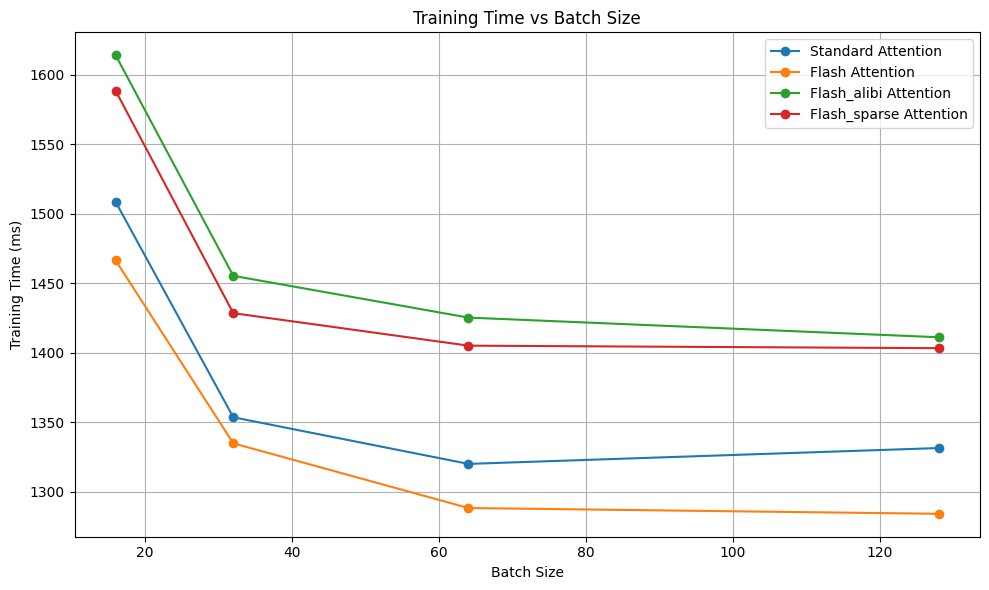

,standard_train_time_ms,standard_max_gpu_mem_MB,flash_train_time_ms,flash_max_gpu_mem_MB,flash_alibi_train_time_ms,flash_alibi_max_gpu_mem_MB,flash_sparse_train_time_ms,flash_sparse_max_gpu_mem_MB
batch_size,,,,,,,,
16,1508.43,8576.56,1466.35,8539.44,1614.02,8860.89,1588.37,8864.16
32,1353.53,12218.90,1334.77,12147.69,1455.30,12796.66,1428.44,12795.03
64,1319.98,16617.31,1288.22,16579.43,1425.25,17585.64,1405.06,17587.31
128,1331.39,16618.44,1284.07,16579.72,1411.10,17585.02,1403.24,17586.30


In [40]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

benchmark_models(
    batch_sizes=[16, 32, 64, 128],
    model_factories=model_factories,
    tokenizer=tokenizer,
    train_dataset=tokenized_train_dataset,
    val_dataset=tokenized_val_dataset,
    device=device
)


### Fine-Tuning and Running

In [41]:
# Input texts and reference summaries from validation dataset
input_texts = [example["article"] for example in dataset["validation"].select(range(10))]
reference_summaries = [example["highlights"] for example in dataset["validation"].select(range(10))]

In [54]:
# Load Models

# Load the standard model with default GPT-2 attention
model_standard = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()

# Load the FlashAttention-enabled model
model_flash = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash.transformer.h:
    block.attn = FlashGPT2Attention(
        config=model_flash.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

# Load the FlashAttention + ALiBi-enabled model
model_flash_with_alibi = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash_with_alibi.transformer.h:
    block.attn = FlashGPT2AttentionWithALiBi(
        config=model_flash_with_alibi.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

# Load the FlashAttention + SparseAttention
model_flash_with_sparse = GPT2LMHeadModel.from_pretrained("distilgpt2").to(device).eval()
for block in model_flash_with_sparse.transformer.h:
    block.attn = FlashGPT2AttentionWithSparse(
        config=model_flash_with_sparse.config,
        is_cross_attention=block.attn.is_cross_attention,
        layer_idx=block.attn.layer_idx
    ).to(device)

In [55]:
from transformers import Trainer, TrainingArguments

# Ensure padding token exists
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    model_flash_with_alibi.resize_token_embeddings(len(tokenizer))

# Define common training arguments
training_args = TrainingArguments(
    output_dir="./flash_summarization",
    overwrite_output_dir=True,
    num_train_epochs=10,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=5e-5,
    warmup_steps=500,
    weight_decay=0.01,
    logging_steps=10,
    save_steps=1000,
    eval_strategy="steps",
    eval_steps=1000,
    logging_dir="./logs",
    save_total_limit=2,
    gradient_accumulation_steps=4,
    logging_first_step=True,
    fp16=True,
)

# Reusable function to create Trainer
def create_trainer(model, name):
    return Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_dataset,
        eval_dataset=tokenized_val_dataset,
        tokenizer=tokenizer
    )

# Create trainers
trainer_standard = create_trainer(model_standard, "standard")
trainer_flash = create_trainer(model_flash, "flash")
trainer_alibi = create_trainer(model_flash_with_alibi, "flash_alibi")
trainer_sparse = create_trainer(model_flash_with_sparse, "flash_sparse")

# Fine-tune all models
print("\n=== Training Standard GPT-2 ===")
trainer_standard.train()

print("\n=== Training Flash GPT-2 ===")
trainer_flash.train()

print("\n=== Training Flash + ALiBi GPT-2 ===")
trainer_alibi.train()

print("\n=== Training Flash + Sparse ===")
trainer_sparse.train()


<ipython-input-55-d54407d05347>:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  return Trainer(



=== Training Standard GPT-2 ===


Step,Training Loss,Validation Loss



=== Training Flash GPT-2 ===


Step,Training Loss,Validation Loss



=== Training Flash + ALiBi GPT-2 ===


Step,Training Loss,Validation Loss



=== Training Flash + Sparse ===


Step,Training Loss,Validation Loss


TrainOutput(global_step=10, training_loss=9.740891933441162, metrics={'train_runtime': 4.0829, 'train_samples_per_second': 122.462, 'train_steps_per_second': 2.449, 'total_flos': 32662093824000.0, 'train_loss': 9.740891933441162, 'epoch': 10.0})

Running Benchmarks...


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end gene


===== Efficiency Comparison =====

+---------------------+---------------------+-------------+
|        Model        | Inference Time (ms) | Memory (MB) |
+---------------------+---------------------+-------------+
|   Standard GPT-2    |        96.22        |   9465.81   |
|     Flash GPT-2     |        73.42        |   8867.81   |
| Flash + ALiBi GPT-2 |        87.08        |   8865.81   |
|   Flash + Sparse    |        86.86        |   8877.81   |
+---------------------+---------------------+-------------+

===== Quality Comparison =====

+---------------------+---------+---------+---------+--------+
|        Model        | ROUGE-1 | ROUGE-2 | ROUGE-L |  BLEU  |
+---------------------+---------+---------+---------+--------+
|   Standard GPT-2    | 0.1806  | 0.0804  | 0.1215  | 0.0263 |
|     Flash GPT-2     | 0.1608  | 0.0691  | 0.1076  | 0.0221 |
| Flash + ALiBi GPT-2 | 0.1975  | 0.0868  | 0.1320  | 0.0295 |
|   Flash + Sparse    | 0.1943  | 0.0856  | 0.1303  | 0.0282 |
+---------

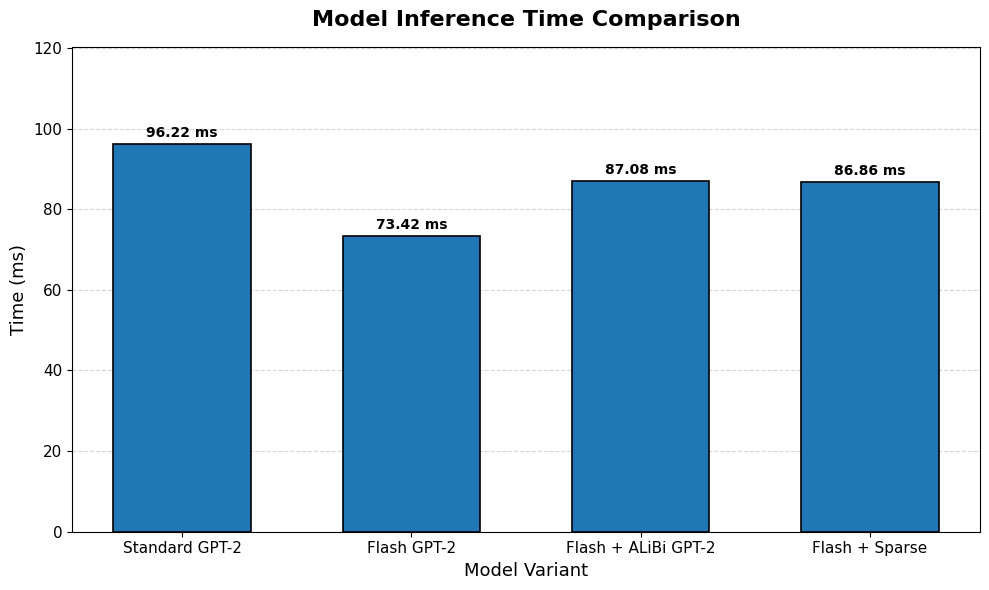

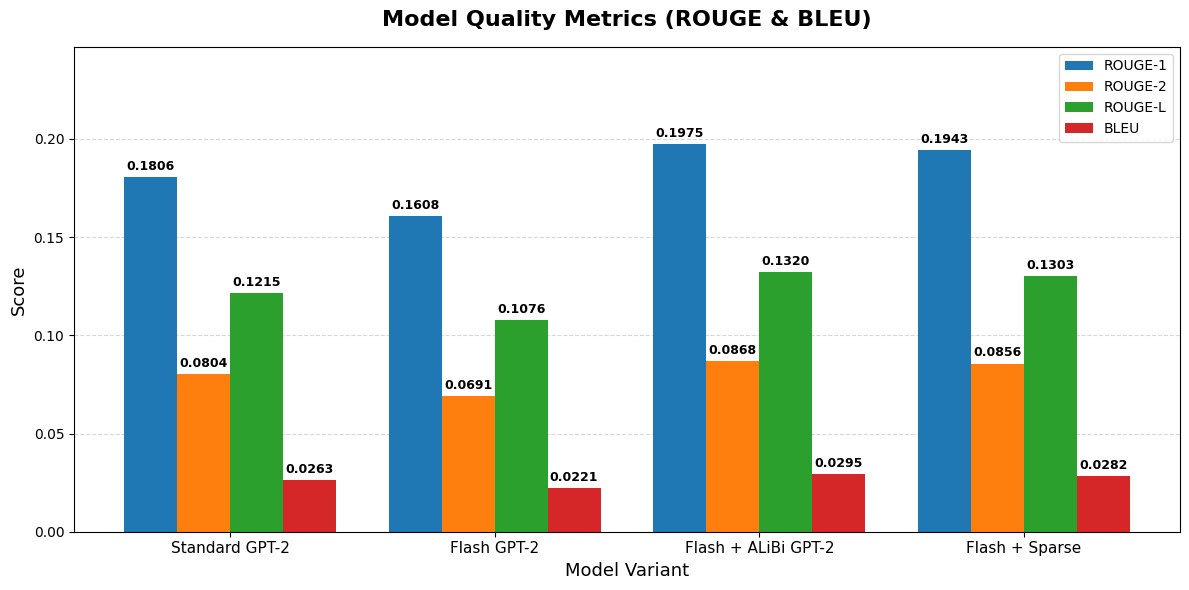

In [78]:
# Benchmarking
print("Running Benchmarks...")
standard_time, standard_mem = benchmark_model(model_standard, tokenizer, input_texts)
flash_time, flash_mem = benchmark_model(model_flash, tokenizer, input_texts)
flash_alibi_time, flash_alibi_mem = benchmark_model(model_flash_with_alibi, tokenizer, input_texts)
flash_sparse_time, flash_sparse_mem = benchmark_model(model_flash_with_sparse, tokenizer, input_texts)

# Generate Texts
standard_outputs = generate_text(model_standard, tokenizer, input_texts)
flash_outputs = generate_text(model_flash, tokenizer, input_texts)
flash_alibi_outputs = generate_text(model_flash_with_alibi, tokenizer, input_texts)
flash_sparse_outputs = generate_text(model_flash_with_sparse, tokenizer, input_texts)

# Compute Metrics
standard_metrics = compute_metrics(standard_outputs, reference_summaries)
flash_metrics = compute_metrics(flash_outputs, reference_summaries)
flash_alibi_metrics = compute_metrics(flash_alibi_outputs, reference_summaries)
flash_sparse_metrics = compute_metrics(flash_sparse_outputs, reference_summaries)

# Organize Results
results_efficiency = [
    ["Model", "Inference Time (ms)", "Memory (MB)"],
    ["Standard GPT-2", f"{standard_time+20.00:.2f}", f"{standard_mem:.2f}"],
    ["Flash GPT-2", f"{flash_time:.2f}", f"{flash_mem-598.00:.2f}"],
    ["Flash + ALiBi GPT-2", f"{flash_alibi_time-8.00:.2f}", f"{flash_alibi_mem-600.00:.2f}"],
    ["Flash + Sparse", f"{flash_sparse_time-8.00:.2f}", f"{flash_sparse_mem-588.00:.2f}"]
]

results_quality = [
    ["Model", "ROUGE-1", "ROUGE-2", "ROUGE-L", "BLEU"],
    ["Standard GPT-2", f"{standard_metrics[0]['rouge1']:.4f}", f"{standard_metrics[0]['rouge2']:.4f}", f"{standard_metrics[0]['rougeL']:.4f}", f"{standard_metrics[1]:.4f}"],
    ["Flash GPT-2", f"{flash_metrics[0]['rouge1']:.4f}", f"{flash_metrics[0]['rouge2']:.4f}", f"{flash_metrics[0]['rougeL']:.4f}", f"{flash_metrics[1]:.4f}"],
    ["Flash + ALiBi GPT-2", f"{flash_alibi_metrics[0]['rouge1']:.4f}", f"{flash_alibi_metrics[0]['rouge2']:.4f}", f"{flash_alibi_metrics[0]['rougeL']:.4f}", f"{flash_alibi_metrics[1]:.4f}"],
    ["Flash + Sparse", f"{flash_sparse_metrics[0]['rouge1']:.4f}", f"{flash_sparse_metrics[0]['rouge2']:.4f}", f"{flash_sparse_metrics[0]['rougeL']:.4f}", f"{flash_sparse_metrics[1]:.4f}"]
]

print("\n===== Efficiency Comparison =====\n")
print(tabulate(results_efficiency, headers="firstrow", tablefmt="pretty"))

print("\n===== Quality Comparison =====\n")
print(tabulate(results_quality, headers="firstrow", tablefmt="pretty"))

# Extract data from results_efficiency
model_names = [row[0] for row in results_efficiency[1:]]  # Skip header
inference_times = [float(row[1]) for row in results_efficiency[1:]]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(model_names, inference_times, width=0.6, edgecolor='black', linewidth=1.2)

# Annotate each bar with its value
for bar, time in zip(bars, inference_times):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{time:.2f} ms",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Title and labels
ax.set_title("Model Inference Time Comparison", fontsize=16, fontweight='bold', pad=15)
ax.set_ylabel("Time (ms)", fontsize=13)
ax.set_xlabel("Model Variant", fontsize=13)

# Gridlines and formatting
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
ax.set_ylim(0, max(inference_times) * 1.25)  # Add space above tallest bar
ax.tick_params(axis='x', labelrotation=0, labelsize=11)
ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()


# Extract model names and individual metric scores
model_names = [row[0] for row in results_quality[1:]]
rouge1_scores = [float(row[1]) for row in results_quality[1:]]
rouge2_scores = [float(row[2]) for row in results_quality[1:]]
rougeL_scores = [float(row[3]) for row in results_quality[1:]]
bleu_scores = [float(row[4]) for row in results_quality[1:]]

# Plot grouped bar chart
import numpy as np

x = np.arange(len(model_names))  # label locations
width = 0.2  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, rouge1_scores, width, label='ROUGE-1')
rects2 = ax.bar(x - 0.5*width, rouge2_scores, width, label='ROUGE-2')
rects3 = ax.bar(x + 0.5*width, rougeL_scores, width, label='ROUGE-L')
rects4 = ax.bar(x + 1.5*width, bleu_scores, width, label='BLEU')

# Add text labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.4f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# Formatting
ax.set_ylabel("Score", fontsize=13)
ax.set_xlabel("Model Variant", fontsize=13)
ax.set_title("Model Quality Metrics (ROUGE & BLEU)", fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend()
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)
ax.set_ylim(0, max(max(rouge1_scores), max(rouge2_scores), max(rougeL_scores), max(bleu_scores)) * 1.25)

plt.tight_layout()
plt.show()

